<a href="https://colab.research.google.com/github/preston-cell/vhs-intro-ai/blob/main/Coding_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution: {0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


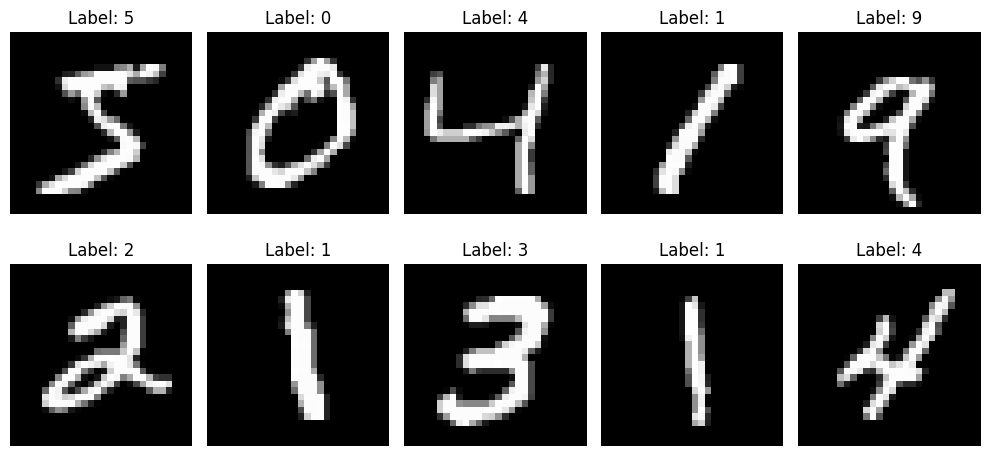

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the data for preprocessing (28x28 images become 1D vectors)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Combine the data for exploration
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# Explore the data
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

# Visualize some examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")


Training set shape: (56000, 784)
Validation set shape: (14000, 784)


In [20]:
# Normalize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]  # Input shape: 784 (28x28 flattened)

model1 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history_adam = model1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8901 - loss: 0.3857 - val_accuracy: 0.9581 - val_loss: 0.3067
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9693 - loss: 0.1055 - val_accuracy: 0.9626 - val_loss: 0.3061
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9793 - loss: 0.0661 - val_accuracy: 0.9680 - val_loss: 0.3130
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9861 - loss: 0.0456 - val_accuracy: 0.9681 - val_loss: 0.5200
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9707 - val_loss: 0.5639
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9694 - val_loss: 0.5710
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9694 - val_loss: 0.5545
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0235

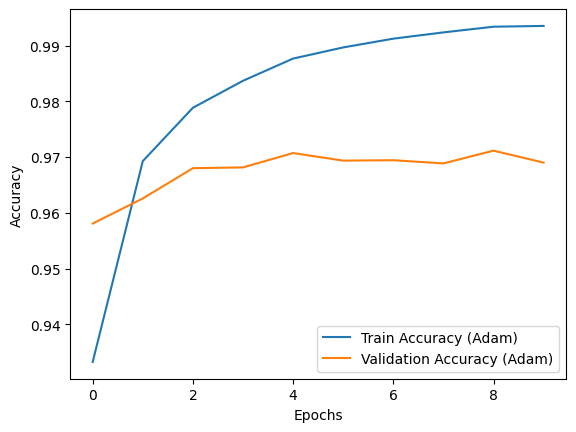

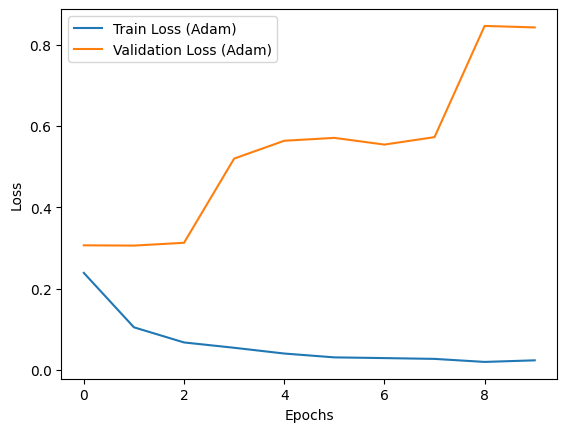

In [24]:
# Plot training and validation accuracy
plt.plot(history_adam.history['accuracy'], label='Train Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_adam.history['loss'], label='Train Loss (Adam)')
plt.plot(history_adam.history['val_loss'], label='Validation Loss (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
model2 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,818 (936.79 KB)

 Trainable params: 237,482 (927.66 KB)

 Non-trainable params: 2,336 (9.12 KB)

In [ ]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history_adam = model2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8659 - loss: 0.4290 - val_accuracy: 0.9604 - val_loss: 2.9988
Epoch 2/10
1278/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9498 - loss: 0.1626